Video Game Sales (User vs Critic Scores)

Question: Do User and Critic Scores Agree?

Introduction

I will be exploring the data of video game sales all over the world with a data set I have found from kaggle (https://www.kaggle.com/datasets/rush4ratio/video-game-sales-with-ratings) this data set includes each games platform, genre, sales from Europe, Japan, North America, and other locations. as well as each games critique score and count, the user score and count, and the games developer and rating (M, E, etc).

Looking at the data, one question I was thinking about was, Do user scores and critic scores agree? Do they agree that this specific game is amazing or do they disagree? To awnser this question I will be analysing the critic and user score columns of the data set. This question is interesting because it will allow us to see how differently critics and consumers of each game think about the game and could reveal some gaps in the data. reason being is that critics are more picky about games while the users are just looking to have fun when playing a game.

Note: All sales related stats are in millions of units.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

Reading Data Set

In [2]:
# read csv file
games = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv')

In [3]:
# display data set
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [4]:
# count NaN values
games.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

Cleaning Up Data

In [5]:
# drop all NaN values
games = games.dropna()

In [6]:
# remove non numerical values and convert values to float type
games = games[games['User_Score'] != 'tbd']
games['User_Score'] = games['User_Score'].astype(float)

In [7]:
# convert critic score into a 0-10 scale (priviously 0-100) and make it into another column
games['Critic_Score_10'] = games['Critic_Score'] / 10
games['Critic_Score_10']

0        7.6
2        8.2
3        8.0
6        8.9
7        5.8
        ... 
16667    4.6
16677    8.1
16696    8.0
16700    6.1
16706    6.0
Name: Critic_Score_10, Length: 6825, dtype: float64

In [8]:
# check for duplicates
games.duplicated().sum()

0

In [9]:
# remove games with few critics and few users
games = games[(games['Critic_Count'] > 5) & (games['User_Count'] > 10)]

In [10]:
# reset index after cleaning
games = games.reset_index()
games

,index,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Critic_Score_10
0,0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E,7.6
1,2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E,8.2
2,3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E,8.0
3,6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E,8.9
4,7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E,5.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5056,16644,Hospital Tycoon,PC,2007.0,Strategy,Codemasters,0.00,0.01,0.00,0.00,0.01,51.0,8.0,3.8,29.0,Big Red Software,E10+,5.1
5057,16656,Fast Racing Neo,WiiU,2016.0,Action,Nintendo,0.00,0.01,0.00,0.00,0.01,81.0,46.0,8.5,151.0,Shin'en,E,8.1
5058,16696,Metal Gear Solid V: Ground Zeroes,PC,2014.0,Action,Konami Digital Entertainment,0.00,0.01,0.00,0.00,0.01,80.0,20.0,7.6,412.0,Kojima Productions,M,8.0
5059,16700,Breach,PC,2011.0,Shooter,Destineer,0.01,0.00,0.00,0.00,0.01,61.0,12.0,5.8,43.0,Atomic Games,T,6.1


Exploring The Data

In [11]:
games['Critic_Score_10'].mean()

7.298597115194626

In [12]:
games['User_Score'].mean()

7.332799841928473

In [13]:
# create a score difference column (NOTE: negitive diff means user score is higher for that game)
games['Score_Diff'] = games['Critic_Score_10'] - games['User_Score']
print(games['Score_Diff'])
print()
games['Score_Diff'].mean()

0      -0.4
1      -0.1
2       0.0
3       0.4
4      -0.8
       ... 
5056    1.3
5057   -0.4
5058    0.4
5059    0.3
5060   -1.2
Name: Score_Diff, Length: 5061, dtype: float64



-0.03420272673384706

In [14]:
# count -ve and +ve differences
neg = 0
pos = 0
zero = 0
for game in games['Score_Diff']:
    if (game < 0) :
        neg += 1
    elif (game > 0):
        pos += 1
    else:
        zero += 1

print("Negative Diff:", neg)
print("Positive Diff:", pos)
print("Equal Diff:", zero)
# NOTE: there are more -ve differences, that means there are more games where the User rates the game higher than the Critics

Negative Diff: 2619
Positive Diff: 2218
Equal Diff: 224


In [15]:
# group the genres with their scores and differnces average
genre_group = games.groupby('Genre')[['Critic_Score_10', 'User_Score', 'Score_Diff']].mean().reset_index()
genre_group

,Genre,Critic_Score_10,User_Score,Score_Diff
0,Action,7.026417,7.251317,-0.224900
1,Adventure,7.156129,7.654839,-0.498710
2,Fighting,7.210417,7.465625,-0.255208
3,Misc,7.146875,7.151339,-0.004464
4,Platform,7.378467,7.651825,-0.273358
5,Puzzle,7.668182,7.795455,-0.127273
6,Racing,7.342455,7.193350,0.149105
7,Role-Playing,7.384759,7.650544,-0.265785
8,Shooter,7.305142,7.142490,0.162652
9,Simulation,7.281991,7.433175,-0.151185


In [16]:
# group platform with genre and their average scores
platfrom_genre = games.groupby(['Platform', 'Genre'])[['Critic_Score_10', 'User_Score', 'Score_Diff']].mean().reset_index()
display(platfrom_genre)
platfrom_genre['Score_Diff'].mean()

,Platform,Genre,Critic_Score_10,User_Score,Score_Diff
0,3DS,Action,6.651282,6.751282,-0.100000
1,3DS,Adventure,7.500000,7.980000,-0.480000
2,3DS,Fighting,6.850000,6.800000,0.050000
3,3DS,Misc,7.000000,7.312500,-0.312500
4,3DS,Platform,7.244444,7.133333,0.111111
...,...,...,...,...,...
188,XOne,Role-Playing,8.000000,7.387500,0.612500
189,XOne,Shooter,7.834483,6.537931,1.296552
190,XOne,Simulation,5.300000,6.300000,-1.000000
191,XOne,Sports,7.366667,5.606667,1.760000


-0.08725497031324592

In [17]:
# group platforms with their scores
year = games.groupby(['Year_of_Release'])[['Critic_Score_10', 'User_Score', 'Score_Diff']].mean().reset_index()
print(year['Score_Diff'].mean())
display(year)


0.21033094196736826


,Year_of_Release,Critic_Score_10,User_Score,Score_Diff
0,1985.0,5.900000,5.800000,0.100000
1,1988.0,6.400000,2.200000,4.200000
2,1992.0,8.500000,8.200000,0.300000
3,1996.0,9.050000,8.516667,0.533333
4,1997.0,8.863636,8.663636,0.200000
5,1998.0,8.638889,8.805556,-0.166667
6,1999.0,8.564000,8.620000,-0.056000
7,2000.0,7.605000,8.001667,-0.396667
8,2001.0,7.807006,8.064331,-0.257325
9,2002.0,7.544269,7.913043,-0.368775


Plotting

<Figure size 2000x1000 with 0 Axes>

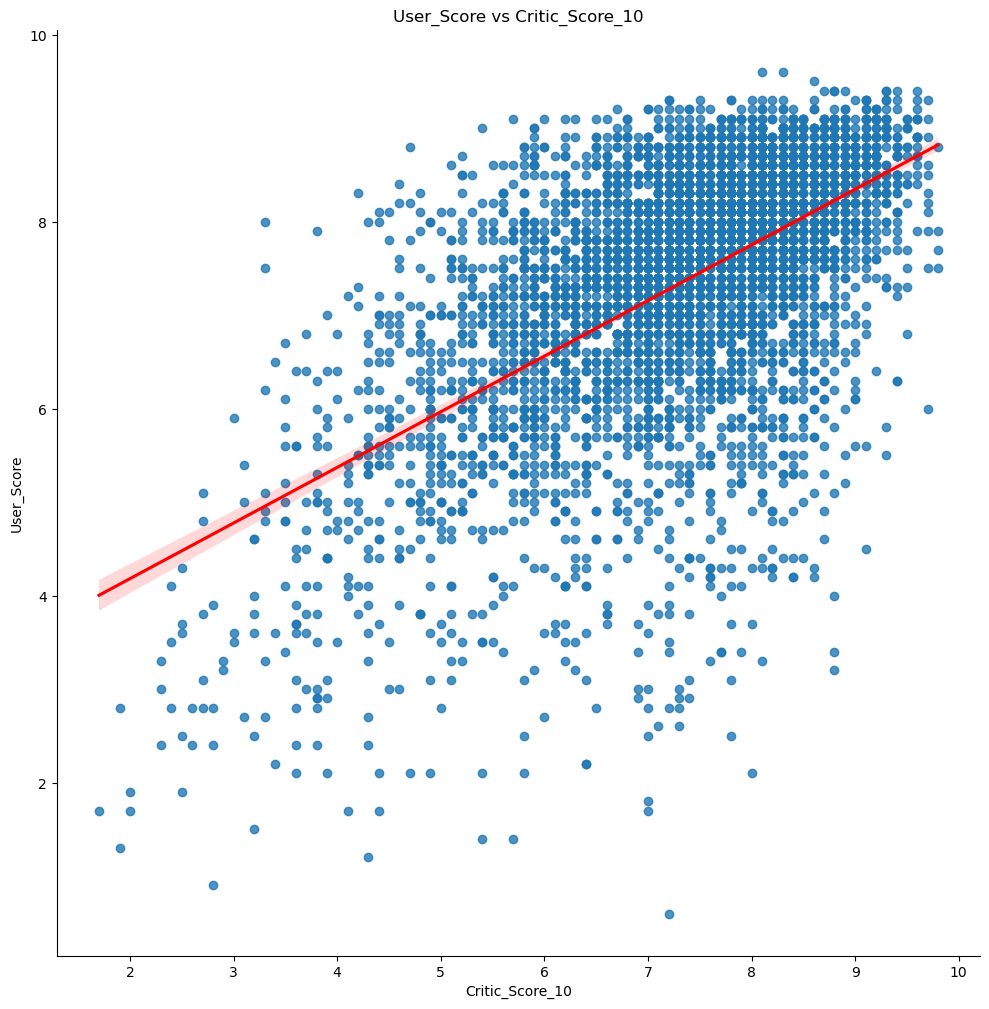

In [18]:
plt.figure(figsize=(20,10))
# line of best fit
line_of_best_fit = sns.lmplot(data=games, x='Critic_Score_10', y='User_Score', line_kws={'color':'red'}, height=10)
plt.title('User_Score vs Critic_Score_10')
display(line_of_best_fit)

<Axes: title={'center': 'Platform (With Genre) vs Score_Diff'}, xlabel='Platform', ylabel='Score_Diff'>

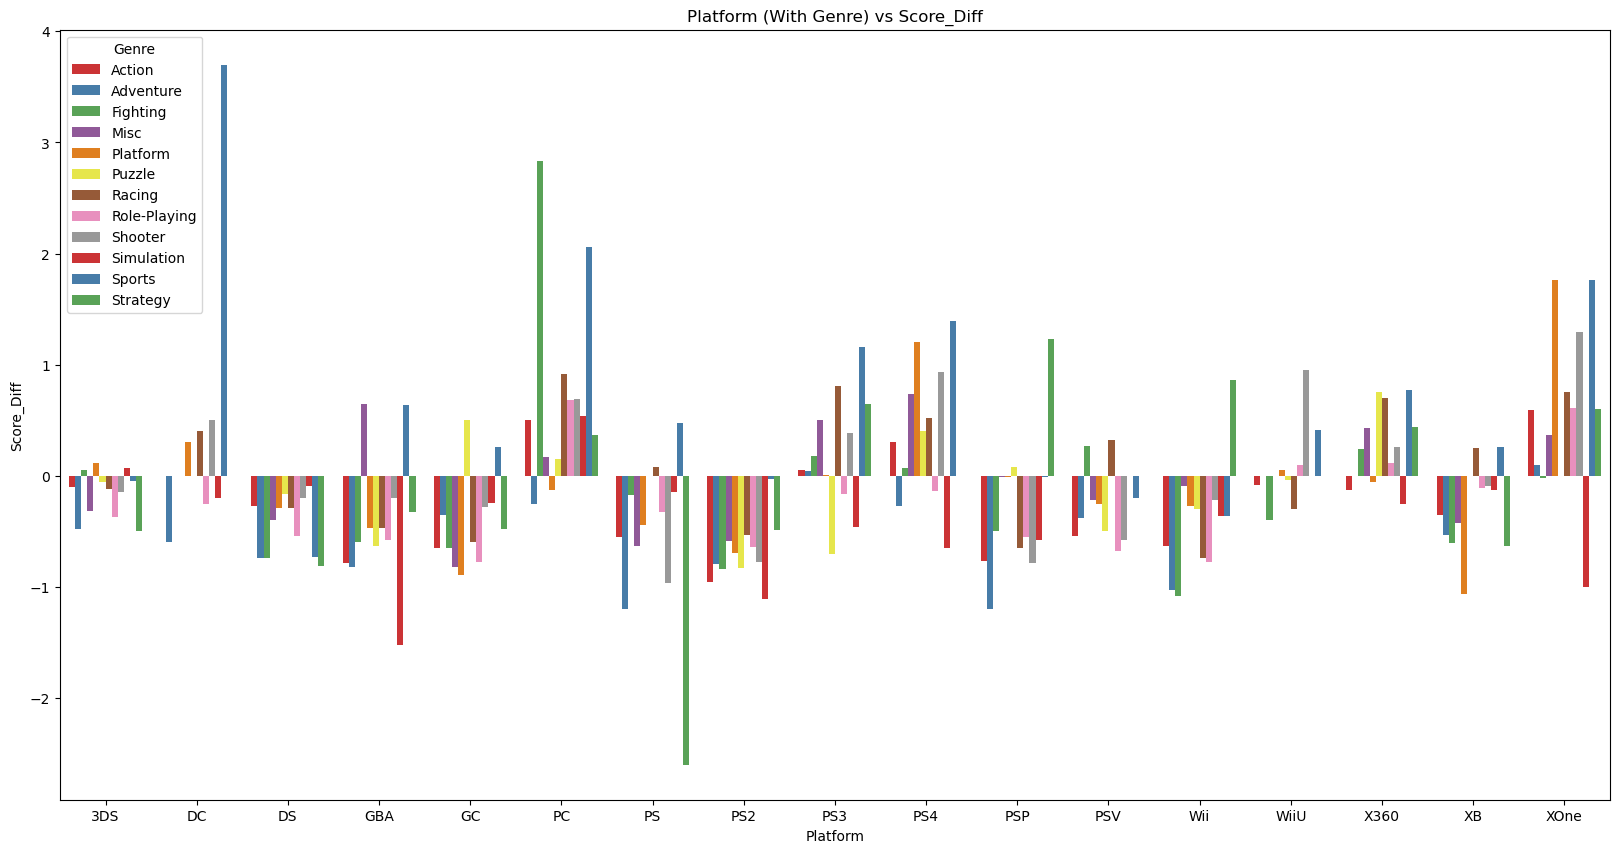

In [19]:
plt.figure(figsize=(20,10))
p = sns.barplot(data=platfrom_genre, x='Platform', y='Score_Diff', hue='Genre', palette='Set1')
plt.title('Platform (With Genre) vs Score_Diff')
display(p)

<Axes: title={'center': 'Year vs Score_Diff'}, xlabel='Year_of_Release', ylabel='Score_Diff'>

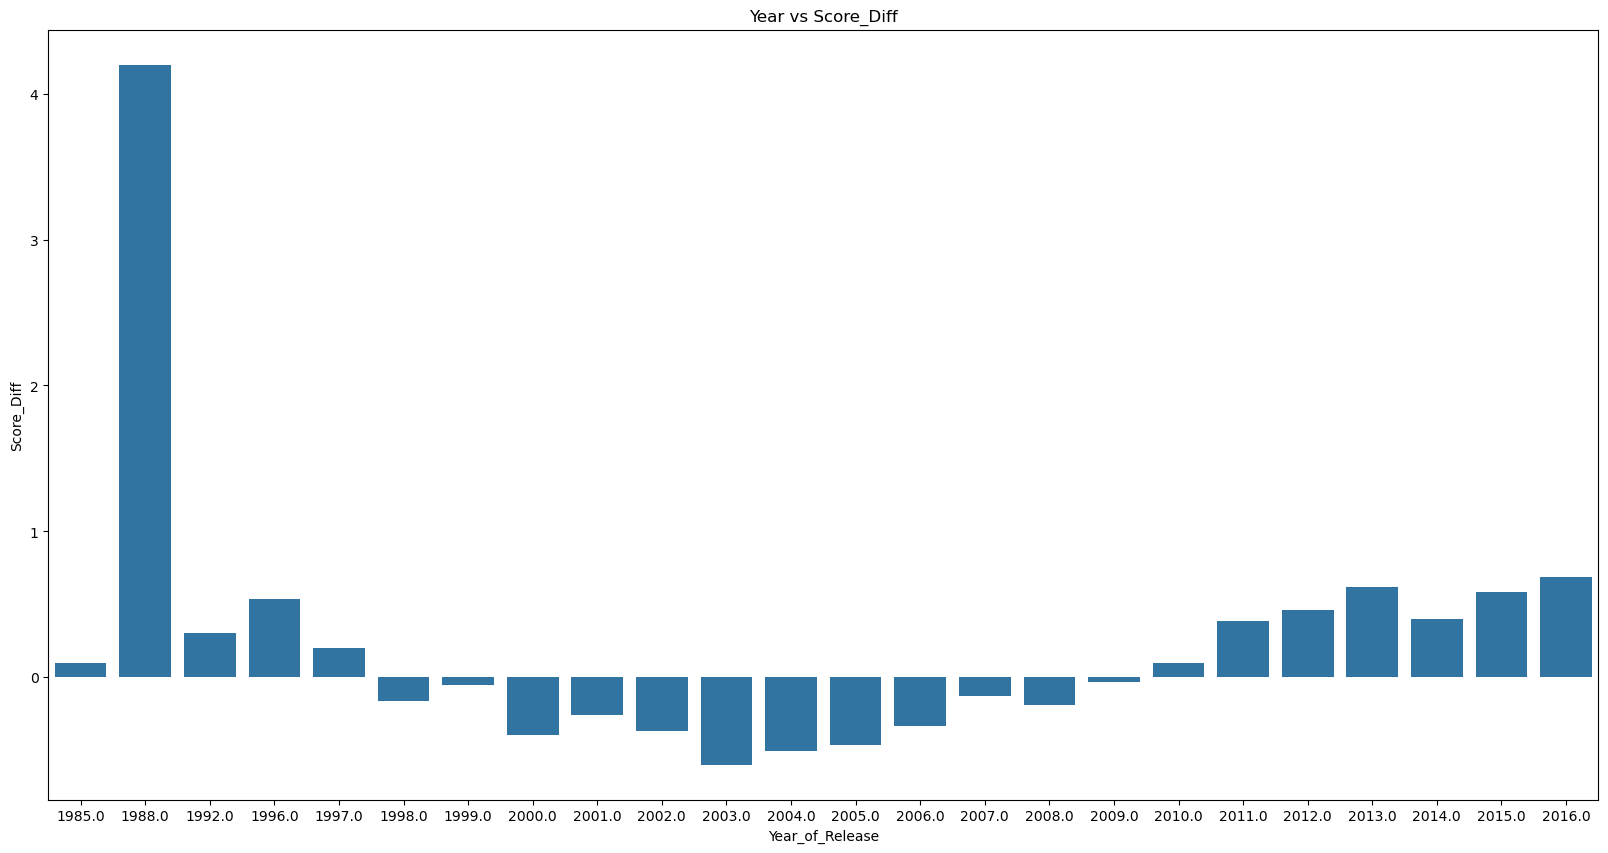

In [20]:
plt.figure(figsize=(20,10))
bar = sns.barplot(data=year, x='Year_of_Release', y='Score_Diff')
plt.title('Year vs Score_Diff')
display(bar)

Disscusion

I first started by creating "Score_Diff" column by subtracting games['Critic_Score_10'] - games['User_Score'] to get the differnece of the two scores of each game in the data set which after using games['Score_Diff'].mean(), keeping in mind that a negative difference means that the user score is higher than the critic score. I have found the average score differential to be -0.034203 which means since this mean is a small negative number, this means on average the user score is rated little higher than the critic score. Which follows with the average Critic score (7.298597115194626) being lower than the average user score (7.332799841928473). Which also follows with the count of negative differneces (2619) being higher than the count of positive differences (2218) and the count of differences equal scores from both the user and the critic (224) from the orignal clean data set (games).

I have preformed a total of three groupings. The first grouping I did was grouping each genre with their average user and critic scores, and their average score differientials. a majority of the genres have a negative score differential on average with no average score differential being 0 or close to 0 meaning that on average when comapring every genre's average score, the user's score for that genre is usually higher than the critic score. 

The second grouping I did was with grouping platforms and genres with their average user and critic scores, and their average score differientials. the mean for this grouping's score differentials was -0.08725497031324592 which is lower than the mean before grouping meaning that the differences are now larger than before, with respect to platform and genre the user score is higher than the critic score.

The third grouping I did was with the year_of_release grouped with their average user and critic scores, and their average score differientials. This time I found the mean of the score differential with respect to the year of release to be positive with a value of 0.21033094196736826 meaning that this time on average the critic score is higher than the user score with respect to the year of release (1985-2016).

I have made three plots to visualise the data sets in 3 different ways. The first plot is a scatter plot with x = 'Critic_Score_10' and y = 'User_Score' with the line of best fit using ungrouped data set (games). This plot shows that the line of best fit has a positive slope meaning that the data has a positive relationship. Looking at the data points of the plot, I can see that most of the data points are scattered away from the line of best fit meaning that most of the data points are not close to each other and have more spread.

The second plot is a bar plot using the grouped data set with platform and genre (platfrom_genre) with genre as the hue. Looking at the plot I can see that for a majority of the genres and platforms the bars are going in the opposite direction meaning that the average score difference is below 0 meaning that the user score is higher on average for that specific genre and platform. There some massive peaks in the plot for example the sports games for DC have a massive positive peak while strategy games on the playstation (PS) have a negative peak meaning that on average the difference for those platforms and genres are large so there is a massive disagreement between the user and critics.

The thrid plot is another bar plot but this time using the grouped year data set. Looking at the plot I can see that from 1985 to 1997 the average score difference is positive with a massive positive peak during 1988. Then from 1998 to 2009, the average score difference is negative with the bars in that time frame being fairly symmetric meaning that the peak during that time frame is right in the middle (2003).

After anaylising the data, it is safe to say that game critics and users do not agree with each other most of the time. I say this because of the scatter plot showing how spread out the two scores are from each other and the first bar plot (platform_genre) showing the difference of the bars (Score_Diff) with respect to the genre and the platform. The count of all the negative, positive, and equal differences from the original clean data set (games) also show the disagreemnet between critics and users with the number of negative differences (2619) being higher than the positive difference (2218) with very little differences being equal (224).